Saving spotify.csv to spotify.csv
Mean Absolute Error: 0.11962088346443439
R-squared: 0.26869904961159474


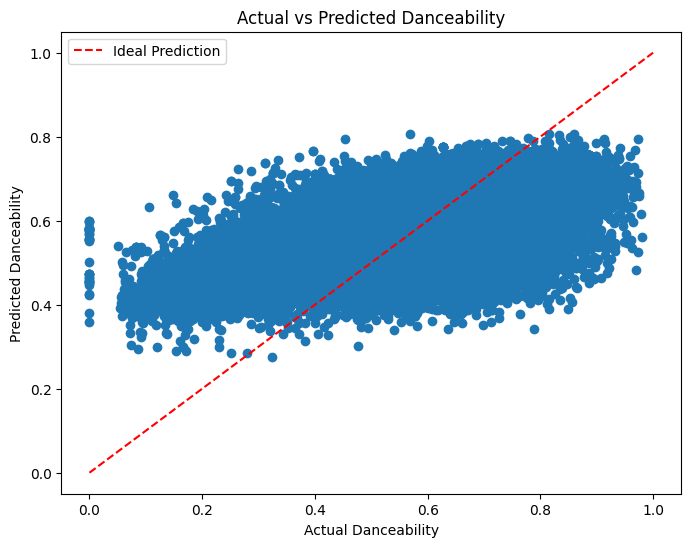

5 Incorrect Predictions:        Actual  Predicted     Error
42819   0.171   0.411052 -0.240052
59311   0.173   0.415408 -0.242408
96815   0.776   0.614399  0.161601
18939   0.627   0.509364  0.117636
72760   0.395   0.506301 -0.111301


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('spotify.csv')

features = ['energy', 'valence', 'tempo', 'acousticness', 'instrumentalness']
df_clean = df.dropna(subset=features + ['danceability'])

X = df_clean[features]
y = df_clean['danceability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], '--r', label="Ideal Prediction")
plt.xlabel('Actual Danceability')
plt.ylabel('Predicted Danceability')
plt.title('Actual vs Predicted Danceability')
plt.legend()
plt.show()

errors = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
errors['Error'] = errors['Actual'] - errors['Predicted']
incorrect_samples = errors[errors['Error'].abs() > 0.1].head(5)
print("5 Incorrect Predictions:", incorrect_samples)

